In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

# QUESTION 1,2

In [2]:
## load in the hierarchy information
url = "https://raw.githubusercontent.com/bcaffo/MRIcloudT1volumetrics/master/inst/extdata/multilevel_lookup_table.txt"
multilevel_lookup = pd.read_csv(url, sep = "\t").drop(['Level5'], axis = 1)
multilevel_lookup = multilevel_lookup.rename(columns = {
    "modify"   : "roi", 
    "modify.1" : "level4",
    "modify.2" : "level3", 
    "modify.3" : "level2",
    "modify.4" : "level1"})
multilevel_lookup = multilevel_lookup[['roi', 'level4', 'level3', 'level2', 'level1']]
multilevel_lookup.head()

,roi,level4,level3,level2,level1
0,SFG_L,SFG_L,Frontal_L,CerebralCortex_L,Telencephalon_L
1,SFG_R,SFG_R,Frontal_R,CerebralCortex_R,Telencephalon_R
2,SFG_PFC_L,SFG_L,Frontal_L,CerebralCortex_L,Telencephalon_L
3,SFG_PFC_R,SFG_R,Frontal_R,CerebralCortex_R,Telencephalon_R
4,SFG_pole_L,SFG_L,Frontal_L,CerebralCortex_L,Telencephalon_L


In [3]:
id = 127
subjectData = pd.read_csv("https://raw.githubusercontent.com/smart-stats/ds4bio_book/main/book/assetts/kirby21AllLevels.csv")
subjectData = subjectData.loc[(subjectData.type == 1) & (subjectData.level == 5) & (subjectData.id == id)]
subjectData = subjectData[['roi', 'volume']]
## Merge the subject data with the multilevel data
subjectData = pd.merge(subjectData, multilevel_lookup, on = "roi")
subjectData = subjectData.assign(icv = "ICV")
subjectData = subjectData.assign(comp = subjectData.volume / np.sum(subjectData.volume))
subjectData

,roi,volume,level4,level3,level2,level1,icv,comp
0,SFG_L,12926,SFG_L,Frontal_L,CerebralCortex_L,Telencephalon_L,ICV,0.009350
1,SFG_R,10050,SFG_R,Frontal_R,CerebralCortex_R,Telencephalon_R,ICV,0.007270
2,SFG_PFC_L,12783,SFG_L,Frontal_L,CerebralCortex_L,Telencephalon_L,ICV,0.009247
3,SFG_PFC_R,11507,SFG_R,Frontal_R,CerebralCortex_R,Telencephalon_R,ICV,0.008324
4,SFG_pole_L,3078,SFG_L,Frontal_L,CerebralCortex_L,Telencephalon_L,ICV,0.002227
...,...,...,...,...,...,...,...,...
275,Chroid_LVetc_L,444,AnteriorLateralVentricle_L,LateralVentricle_L,Ventricle,CSF,ICV,0.000321
276,Chroid_LVetc_R,371,AnteriorLateralVentricle_R,LateralVentricle_R,Ventricle,CSF,ICV,0.000268
277,IV_ventricle,2700,IV_ventricle,IV_ventricle,Ventricle,CSF,ICV,0.001953
278,ECCL_L,292,inf_DPWM_L,InferiorWM_L,WhiteMatter_L,Telencephalon_L,ICV,0.000211


In [4]:
u_values=[]
for i in range(6,1,-1):
  g=np.unique(subjectData.iloc[:,i]).tolist()
  for p in range(len(g)):
    u_values.append(g[p])
  
s=[]
t=[]
v=[]
for k in range(6,2,-1):
  for i in range(subjectData.shape[0]):
    uf=subjectData.iloc[i,k]
    u=u_values.index(uf)
    lf=subjectData.iloc[i,k-1]
    l=u_values.index(lf)
    vv=subjectData.iloc[i,7]
    s.append(u)
    t.append(l)
    v.append(vv)


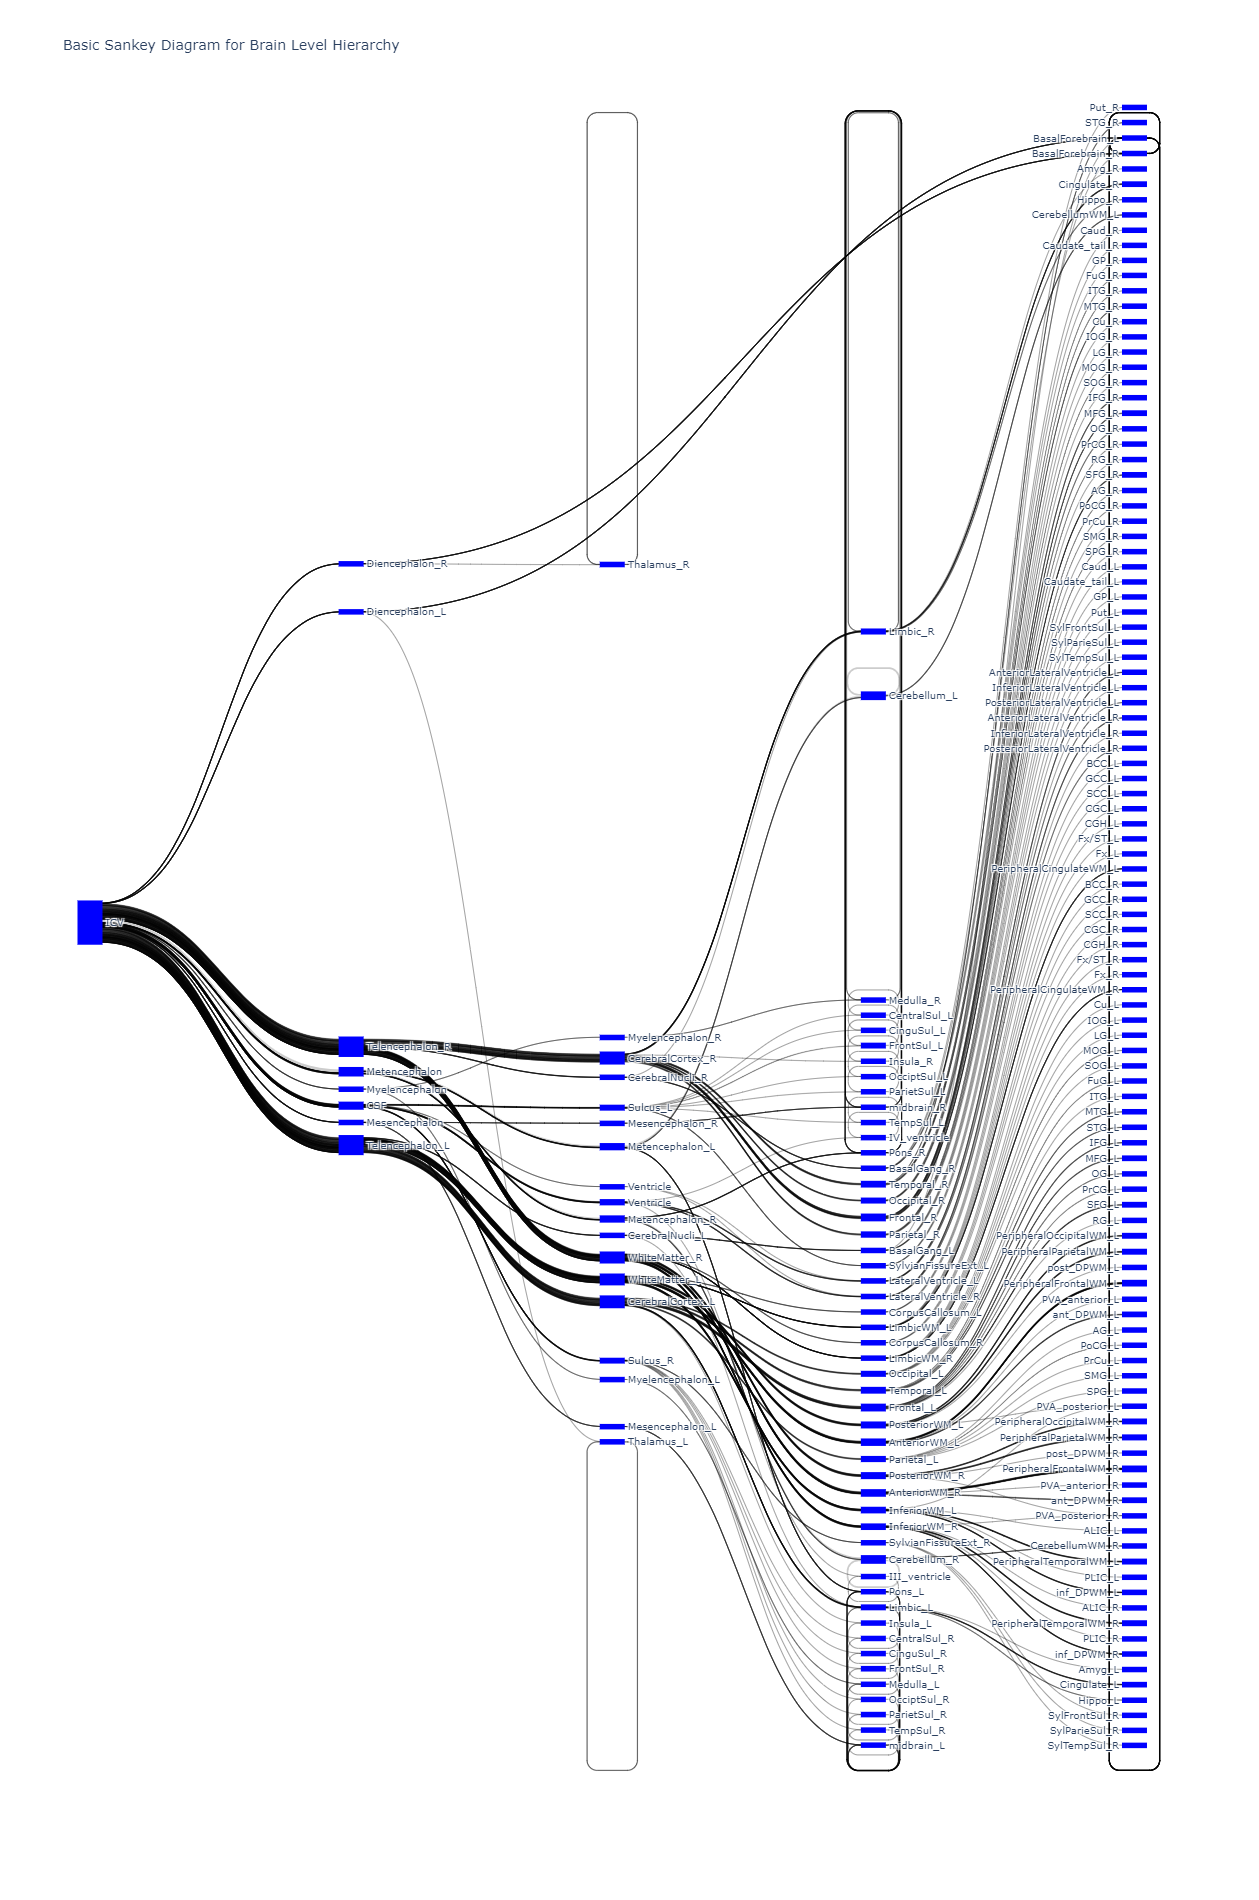

In [10]:
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "blue", width = 5),
      label = u_values,
      color = "blue"
    ),
    link = dict(
      source = s, # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = t,
      value = v
  ))])

fig.update_layout(autosize=False,width=1250,height=1900,title_text="Basic Sankey Diagram for Brain Level Hierarchy", font_size=10)
fig.show()

In [13]:
fig.write_html("SankeyDiagram-HW_4.html")

## WEB PAGE FOR SANKEY DIAGRAMS
https://herambgupta.github.io/ds4ph-webpages/SankeyDiagram-HW_4.html

# QUESTION 3, 4

In [166]:
annual=pd.read_csv("county_annual.csv").drop(['Unnamed: 0'],axis=1)
population=pd.read_csv("county_pop_arcos.csv").drop(['Unnamed: 0'],axis=1)
land=pd.read_csv("land_area.csv").drop(['Unnamed: 0'],axis=1)

## Printing first 5 entries from specific columns for the population data set 

In [167]:
population[['BUYER_COUNTY','BUYER_STATE','STATE', 'COUNTY', 'year', 'population']].head(5)

,BUYER_COUNTY,BUYER_STATE,STATE,COUNTY,year,population
0,AUTAUGA,AL,1,1,2006,51328
1,BALDWIN,AL,1,3,2006,168121
2,BARBOUR,AL,1,5,2006,27861
3,BIBB,AL,1,7,2006,22099
4,BLOUNT,AL,1,9,2006,55485


## Printing out some of the missing data in the annual dataset

In [168]:
annual.loc[np.isnan(annual.countyfips)].head(10)

,BUYER_COUNTY,BUYER_STATE,year,count,DOSAGE_UNIT,countyfips
187,ADJUNTAS,PR,2006,147,102800.0,NaN
188,ADJUNTAS,PR,2007,153,104800.0,NaN
189,ADJUNTAS,PR,2008,153,45400.0,NaN
190,ADJUNTAS,PR,2009,184,54200.0,NaN
191,ADJUNTAS,PR,2010,190,56200.0,NaN
192,ADJUNTAS,PR,2011,186,65530.0,NaN
193,ADJUNTAS,PR,2012,138,57330.0,NaN
194,ADJUNTAS,PR,2013,138,65820.0,NaN
195,ADJUNTAS,PR,2014,90,59490.0,NaN
196,AGUADA,PR,2006,160,49200.0,NaN


## Printing out some of the missing data in the annual dataset other than Puerto Rico (PR)

In [169]:
annual.loc[np.isnan(annual.countyfips) & (annual.BUYER_STATE != "PR").to_numpy()].head(10)

,BUYER_COUNTY,BUYER_STATE,year,count,DOSAGE_UNIT,countyfips
10071,GUAM,GU,2006,319,265348.0,NaN
10072,GUAM,GU,2007,330,275600.0,NaN
10073,GUAM,GU,2008,313,286900.0,NaN
10074,GUAM,GU,2009,390,355300.0,NaN
10075,GUAM,GU,2010,510,413800.0,NaN
10076,GUAM,GU,2011,559,475600.0,NaN
10077,GUAM,GU,2012,616,564800.0,NaN
10078,GUAM,GU,2013,728,623200.0,NaN
10079,GUAM,GU,2014,712,558960.0,NaN
17429,MONTGOMERY,AR,2006,469,175390.0,NaN


## Setting COUNTY FIPS values in 'ARKANSAS' state in 'MONTGOMERY' county to '05097' 

In [170]:
for i in range(annual.shape[0]):
    if(annual.iloc[i,1]=='AR' and annual.iloc[i,0]=='MONTGOMERY'):
        annual.iloc[i,5]=5097        

In [171]:
annual.loc[(annual.BUYER_STATE=='AR') & (annual.BUYER_COUNTY=='MONTGOMERY')].head(4)

,BUYER_COUNTY,BUYER_STATE,year,count,DOSAGE_UNIT,countyfips
17429,MONTGOMERY,AR,2006,469,175390.0,5097.0
17430,MONTGOMERY,AR,2007,597,241270.0,5097.0
17431,MONTGOMERY,AR,2008,561,251760.0,5097.0
17432,MONTGOMERY,AR,2009,554,244160.0,5097.0


## Dropping Rows with BUYER_COUNTY =NA

In [172]:
idx=[]
for i in range(annual.shape[0]):
    if(pd.isna(annual.iloc[i,0])):
        idx.append(i)
annual=annual.drop(idx)

## Creating new table 'LAND_AREA' and renaming column 'STCOU' to 'countyfips

In [173]:
land_area=land[['Areaname', 'STCOU', 'LND110210D']]
land_area=land_area.rename(columns={'STCOU':'countyfips'})
land_area

,Areaname,countyfips,LND110210D
0,UNITED STATES,0,3531905.43
1,ALABAMA,1000,50645.33
2,"Autauga, AL",1001,594.44
3,"Baldwin, AL",1003,1589.78
4,"Barbour, AL",1005,884.88
...,...,...,...
3193,"Sweetwater, WY",56037,10426.65
3194,"Teton, WY",56039,3995.38
3195,"Uinta, WY",56041,2081.26
3196,"Washakie, WY",56043,2238.55


## Join Tables

In [178]:
county_info=pd.merge(population,land_area,how='left',on='countyfips')

## Diplaying Counts

In [181]:
print('The shape of the table land is:',land.shape[0])
print('The shape of the table land_area is:',land_area.shape[0])
print('The shape of the table county_info is:',county_info.shape[0])
print('The shape of the table population is:',population.shape[0])

The shape of the table land is: 3198
The shape of the table land_area is: 3198
The shape of the table county_info is: 28265
The shape of the table population is: 28265


## Plotting an interactive scatter plot of average number of opiod pills by year plot using plotly

In [202]:
op_sum=annual.groupby('year').sum()
count=op_sum.iloc[:,0]
dosage=op_sum.iloc[:,1]

In [197]:
op_sum.index

Int64Index([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014], dtype='int64', name='year')

In [192]:
op_sum

,count,DOSAGE_UNIT,countyfips
year,,,
2006,20846194,8.200273e+09,90859633.0
2007,22933371,9.236378e+09,90752352.0
2008,24458378,1.001014e+10,90569213.0
2009,25378554,1.084962e+10,90647244.0
2010,27280776,1.163474e+10,90600595.0
2011,28546680,1.244170e+10,90876618.0
2012,28491486,1.233058e+10,91038072.0
2013,28733665,1.191350e+10,90923325.0
2014,24594414,1.162656e+10,90936750.0


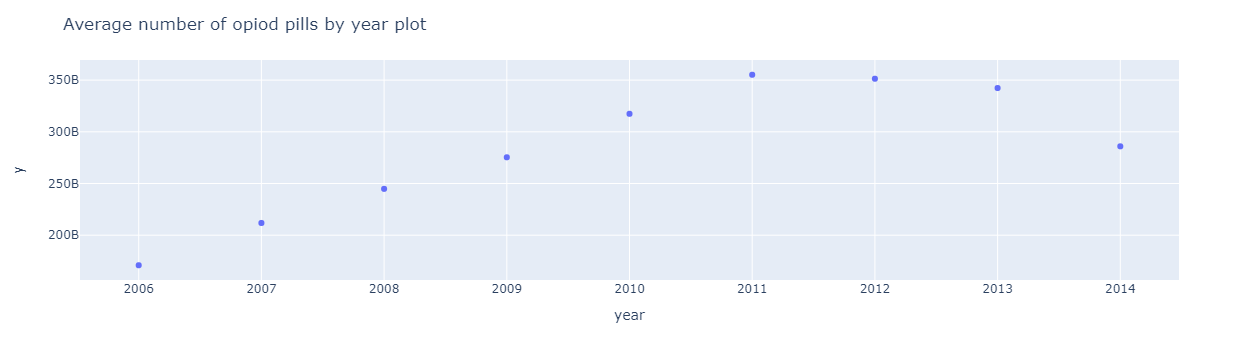

In [205]:
fig = px.scatter(op_sum, x=op_sum.index, y=dosage/1000000*count)
fig.update_layout(title="Average number of opiod pills by year plot")
fig.show()

In [206]:
fig.write_html("OpiodPills-HW_4.html")

## WEB PAGE FOR AVERAGE NUMBER OF PILLS BY YEAR
https://herambgupta.github.io/ds4ph-webpages/OpiodPills-HW_4.html